In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bayesian Nural Network (BNN) approximates Gaussian Processes (GP) under certain condition.

Since the core of the approximation is based on Central Limit Theorem (CLT), the more neurons there are the better a BNN approximates GP.<br>
In the following case, we will use BNN with `tanh` and `step` activation to illustrate this.<br>

BNN with `tanh` activation approximates a special type of GP, Wiener Process.<br>
It turns out that in this case, the kernel is $$k(x_1,x_2)=min(x_1,x_2)$$ which is a type of a <i>non-stationary</i> kernel.<br>
As a result, GP here is non-stationary process, and it is a Wiener Process.

In [10]:
class BNN():
    def __init__(self, n_neurons, activation, sigma_a, sigma_u, sigma_b, omega_v):
        self.n_neurons = n_neurons
        self.activation = activation
        assert activation in ['tanh', 'step']
        self.sigma_a = sigma_a
        self.sigma_u = sigma_u
        self.sigma_b = sigma_b
        self.omega_v = omega_v
        self.init_weight()

    def init_weight(self):
        self.u = np.random.normal(loc=0, scale=self.sigma_u, size=(1, self.n_neurons))
        self.a = np.random.normal(loc=0, scale=self.sigma_a, size=(1, self.n_neurons))
        self.v = np.random.normal(loc=0, scale=self.omega_v * np.sqrt(self.n_neurons) ** -1, size=(self.n_neurons,1))
        self.b = np.random.normal(loc=0, scale=self.sigma_b)

    def predict(self, xs):
        if self.activation == 'step':
            h = np.sign(np.matmul(xs, self.u) + self.a)# (N, d)
        elif self.activation == 'tanh':
            h = np.tanh(np.matmul(xs, self.u) + self.a)
        f = np.matmul(h, self.v) + self.b
        return f

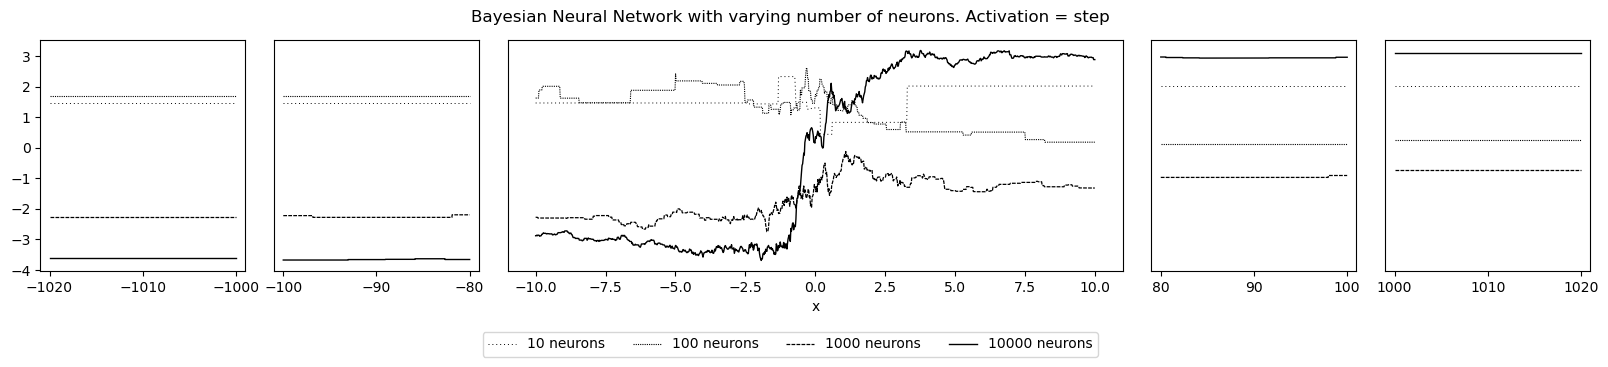

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20,3), gridspec_kw=dict(width_ratios=(1,1,3,1,1), wspace=0.1))
linestyles = [(0, (1,3)), (0, (1,1)), (0, (3,1)), '-']
list_n_neurons = [10, 100, 1000, 10000]
lines = []
for i, n_neurons in enumerate(list_n_neurons):#, 100000):
    bnn = BNN(n_neurons=n_neurons, activation='step', sigma_u=1, sigma_a=1, sigma_b=1, omega_v=1)
    for ax, bound in zip(axs.flatten(), [(-1020,-1000), (-100,-80), (-10,10), (80, 100), (1000,1020)]):
        left, right = bound
        xs = np.linspace(left,right,1000).reshape(-1,1)
        f = bnn.predict(xs)
        lines.append(ax.plot(xs, f, linestyle=linestyles[i], c='k', linewidth=0.1 * i + 0.7))
for i, ax in enumerate(axs.flatten()):
    if i != 2:
        ax.set_ylim(axs[2].get_ylim())
    if i == 2:
        ax.set_xlabel('x')
    if i > 0:
        ax.set_yticks([])
fig.suptitle("Bayesian Neural Network with varying number of neurons. Activation = step")
fig.legend(handles=[l[0] for l in lines[::5]], labels=[f"{n} neurons" for n in list_n_neurons], loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2))

## Observation
The more neurons there are, the larger the distance from `x=0` such that the fuction becomes almost constant (ignoring noise).<br>
This is because 

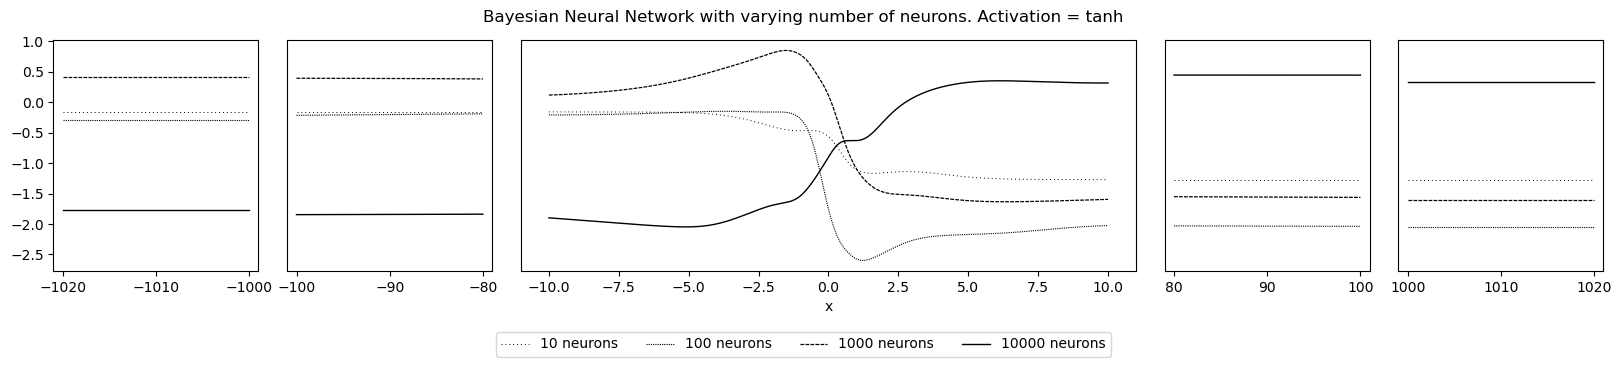

In [23]:
fig, axs = plt.subplots(1,5, figsize=(20,3), gridspec_kw=dict(width_ratios=(1,1,3,1,1), wspace=0.1))
linestyles = [(0, (1,3)), (0, (1,1)), (0, (3,1)), '-']
list_n_neurons = [10, 100, 1000, 10000]
lines = []
for i, n_neurons in enumerate(list_n_neurons):#, 100000):
    bnn = BNN(n_neurons=n_neurons, activation='tanh', sigma_u=1, sigma_a=1, sigma_b=1, omega_v=1)
    for ax, bound in zip(axs.flatten(), [(-1020,-1000), (-100,-80), (-10,10), (80, 100), (1000,1020)]):
        left, right = bound
        xs = np.linspace(left,right,1000).reshape(-1,1)
        f = bnn.predict(xs)
        lines.append(ax.plot(xs, f, linestyle=linestyles[i], c='k', linewidth=0.1 * i + 0.7))
for i, ax in enumerate(axs.flatten()):
    if i != 2:
        ax.set_ylim(axs[2].get_ylim())
    if i == 2:
        ax.set_xlabel('x')
    if i > 0:
        ax.set_yticks([])
fig.suptitle("Bayesian Neural Network with varying number of neurons. Activation = tanh")
fig.legend(handles=[l[0] for l in lines[::5]], labels=[f"{n} neurons" for n in list_n_neurons], loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2))